<a href="https://colab.research.google.com/github/Bunny825/EarlyStopping_DL/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles



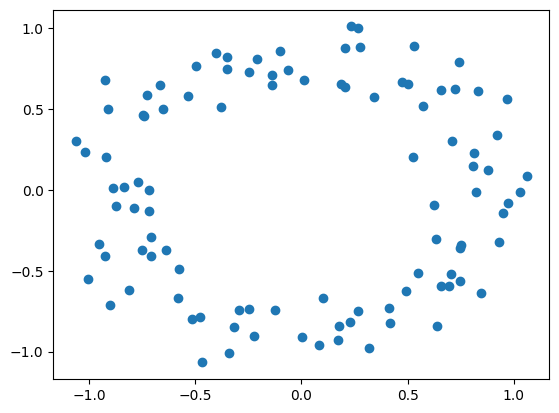

In [ ]:
x,y=make_circles(n_samples=100,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1])


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)


In [ ]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer='adam')

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.4742 - loss: 0.7014 - val_accuracy: 0.6500 - val_loss: 0.6898
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4555 - loss: 0.6964 - val_accuracy: 0.5500 - val_loss: 0.6907
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4563 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4234 - loss: 0.6925 - val_accuracy: 0.5500 - val_loss: 0.6951
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5359 - loss: 0.6902 - val_accuracy: 0.4500 - val_loss: 0.6968
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5320 - loss: 0.6895 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5242 - loss: 0.6875 - val_accuracy: 0.4000 - val_loss: 0.7004
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5125 - loss: 0.6875 - val_accuracy: 0.4500 - 

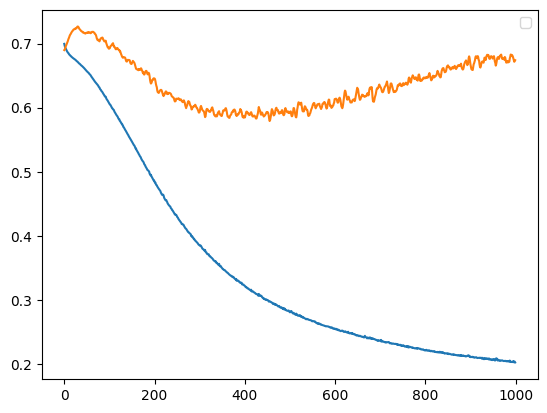

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

**With Early-Stopping**

In [ ]:
model_new=Sequential()
model_new.add(Dense(256,activation='relu',input_dim=2))
model_new.add(Dense(1,activation='sigmoid'))

model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model_new.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callback=EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=20,verbose=1,baseline=None,restore_best_weights=False)
history_new=model_new.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,callbacks=callback,epochs=1000)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5508 - loss: 0.6770 - val_accuracy: 0.4000 - val_loss: 0.7222
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5609 - loss: 0.6743 - val_accuracy: 0.4000 - val_loss: 0.7227
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5375 - loss: 0.6800 - val_accuracy: 0.4000 - val_loss: 0.7221
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5531 - loss: 0.6781 - val_accuracy: 0.4000 - val_loss: 0.7221
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5977 - loss: 0.6695 - val_accuracy: 0.4000 - val_loss: 0.7222
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6039 - loss: 0.6666 - val_accuracy: 0.4000 - val_loss: 0.7223
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5922 - loss: 0.6718 - val_accuracy: 0.4000 - val_loss: 0.7218
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6039 - loss: 0.6644 - val_accuracy: 0.4000 - v

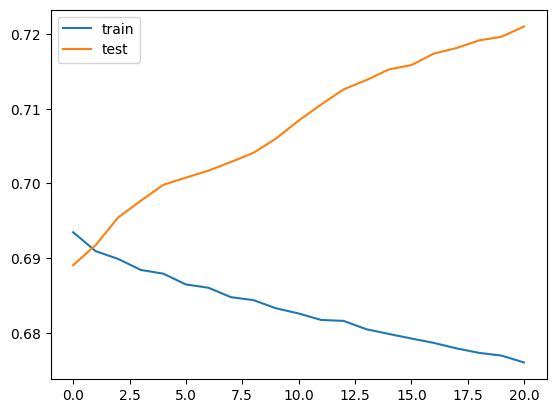

In [ ]:
plt.plot(history.history_['loss'],label="train")
plt.plot(history.history['val_loss'],label="test")
plt.legend()
plt.show()